# Полиномиальная регрессия

Пример обучения полиномиальной регресиии

---


## Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Загрузка датасета

Чтение данных из CSV, где `x` — признак, `y` — целевая переменная.

In [2]:
data = pd.read_csv("../datasets/polynomial_regression.csv")

X = data[["x"]].values
Y = data["y"].values

## График исходных данных

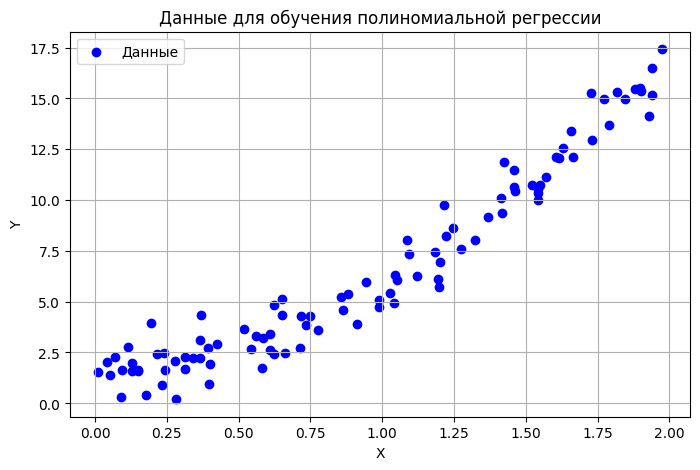

In [3]:
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, color='blue', label='Данные')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Данные для обучения полиномиальной регрессии')
plt.legend()
plt.grid(True)
plt.show()

## Разделение датасета на тестовую и тренировочные выборки

80% датасета это тренировочные данные, 20% - тестовые

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Преобразование признаков

In [5]:
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


## Создание и обучение модели

In [6]:
model = LinearRegression()
model.fit(X_train_poly, Y_train)

coefs = model.coef_
intercept = model.intercept_
print(f"{intercept:.3f}")
print(f"{coefs}")

1.513
[0.61888433 3.60519253]


## Предсказание на тестовой выборке и метрики

In [7]:
Y_test_pred = model.predict(X_test_poly)

mse = mean_squared_error(Y_test, Y_test_pred)
mae = mean_absolute_error(Y_test, Y_test_pred)
r2 = r2_score(Y_test, Y_test_pred)

print(f"MSE  = {mse:.3f}")
print(f"MAE  = {mae:.3f}")
print(f"R²   = {r2:.3f}")

MSE  = 0.637
MAE  = 0.579
R²   = 0.973


## Визуализация линии регрессии

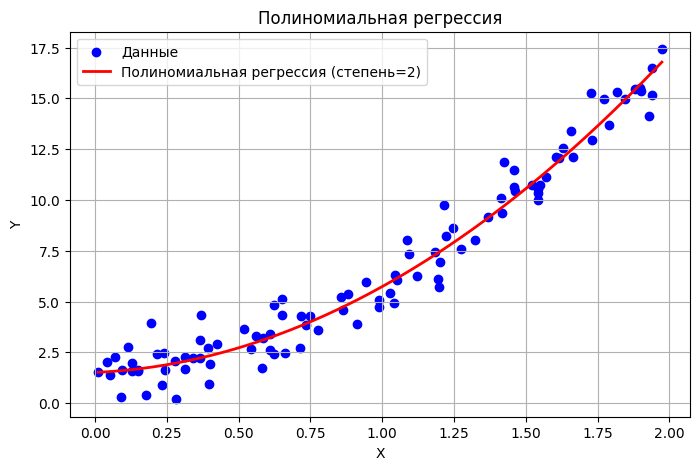

In [8]:
plt.figure(figsize=(8,5))
x_line = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
x_line_poly = poly.transform(x_line)
y_line = model.predict(x_line_poly)

plt.scatter(X, Y, color='blue', label='Данные')
plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Полиномиальная регрессия (степень={degree})')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Полиномиальная регрессия')
plt.legend()
plt.grid(True)
plt.show()